## Springboard Data Science Career Track - Capstone 2

#### John Peterson

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Data Wrangling and EDA

In [12]:
print("Train Shape : ", train_df.shape)
print("Test Shape : ", test_df.shape)

Train Shape :  (4459, 4993)
Test Shape :  (49342, 4992)


In [8]:
print(train_df.head())

          ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115    ...      3ecc09859  \
0          0          0          0          0    ...            0.0   
1          0          0          0          0    ...            0.0   
2          0          0          0          0    ...            0.0   
3          0          0          0          0    ...            0.0   
4          0          0          0          0    ...            0.0   

   9281abeea  8675bec0b  3a13ed79a  f677d4d13  71b203550  137efaa80  \
0        0.0        0.0          0          0          0          0  

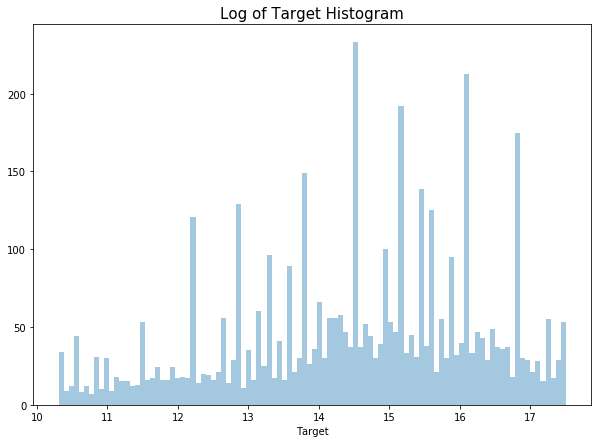

In [18]:
# plot log of target 
plt.figure(figsize=(10,7))
sns.distplot(np.log1p(train_df['target'].values), bins=100, kde=False)
plt.xlabel('Target')
plt.title('Log of Target Histogram', fontsize=15)
plt.show()

In [24]:
# missing values check
missing = train_df.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_total']
missing = missing[missing['missing_total']>0]
missing = missing.sort_values(by='missing_total')
missing

,column_name,missing_total


In [25]:
# review the data types of columns
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,3147
1,float64,1845
2,object,1


** Notes **

Links to Kaggle posts and kernels about the "leak"

<https://www.kaggle.com/c/santander-value-prediction-challenge/discussion/61329>

<https://www.kaggle.com/titericz/the-property-by-giba>

<https://www.kaggle.com/c/santander-value-prediction-challenge/discussion/61394>
